In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np

# Grafica baterías

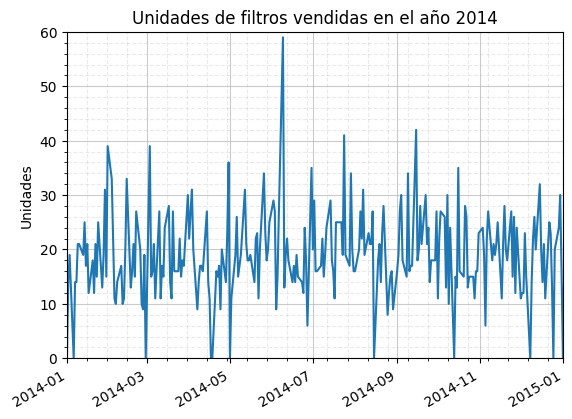

In [15]:
df = pd.read_csv(f'data/filtros.csv')
df = df.rename({'clave1':'fecha', 'uniTotal':'unidades'}, axis=1)
df['fecha'] = pd.to_datetime(df['fecha'], format="%Y%m%d")
df = df.set_index(['fecha'])
df = df.resample('D').first()
df.fillna(value=0, inplace=True)
df = df.groupby(pd.Grouper(freq='B'))
df = df.sum()
df[df['unidades'] < 0] = 0
df = df["2010-01-01":"2024-06-30"]

fig,ax = plt.subplots()
ax.plot(df)
ax.axis(xmin=dt(2014,1,1), xmax=dt(2015,1,1), ymin=0, ymax=60)

ax.minorticks_on()
ax.grid(which='major', alpha = 0.65, linestyle='-')
ax.grid(which='minor', alpha = 0.25, linestyle='--')
ax.set_title('Unidades de filtros vendidas en el año 2014')
ax.set_ylabel('Unidades')
fig.autofmt_xdate()
fig.savefig('../memoria/imagenes/filtros2014.pdf')

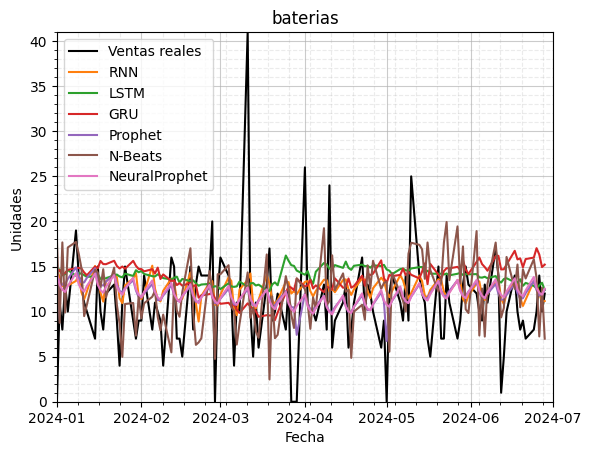

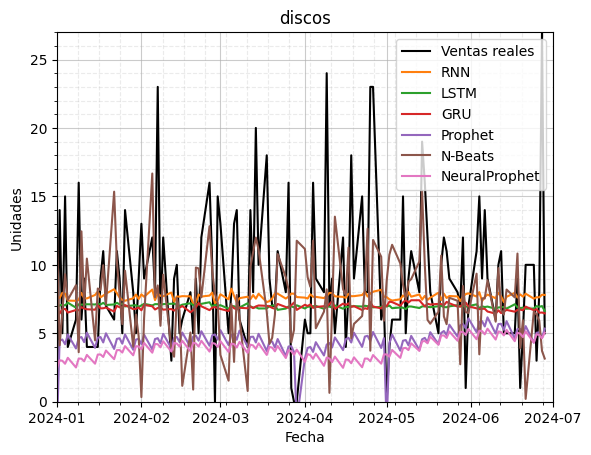

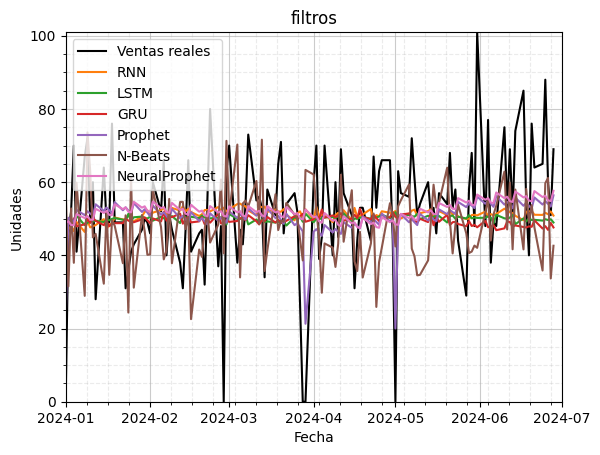

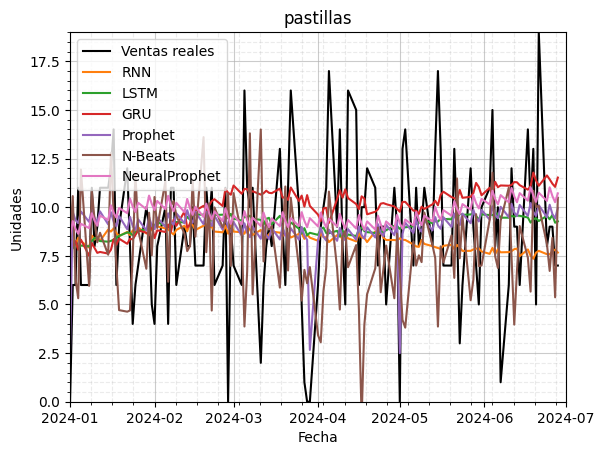

In [2]:
names = ['baterias', 'discos', 'filtros', 'pastillas']
for name in names:
    df = pd.read_csv(f'results/resultados_{name}.csv')
    df['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")
    df = df.set_index(['fecha'])
    fig, ax = plt.subplots()
    lines = ax.plot(df, label=df.columns)
    lines[0].set_color('k')
    lines[0].set_label('Ventas reales')
    ax.minorticks_on()
    ax.grid(which='major', alpha = 0.65, linestyle='-')
    ax.grid(which='minor', alpha = 0.25, linestyle='--')
    ax.axis([dt(2024,1,1), dt(2024,7,1), 0, max(df.max())])
    ax.legend()
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Unidades')
    #plt.autofmt_xdate()
    plt.savefig(f'figs/prediccion_{name}.svg', format='svg')
    ax.set_title(f'{name}')
    plt.show()

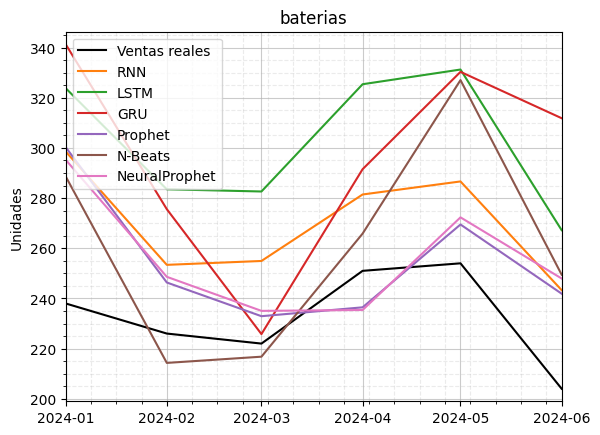

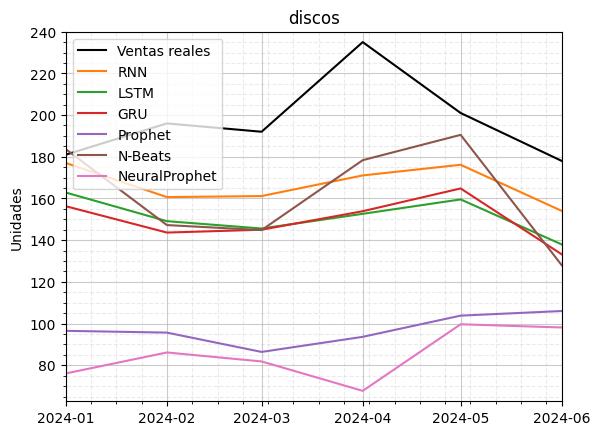

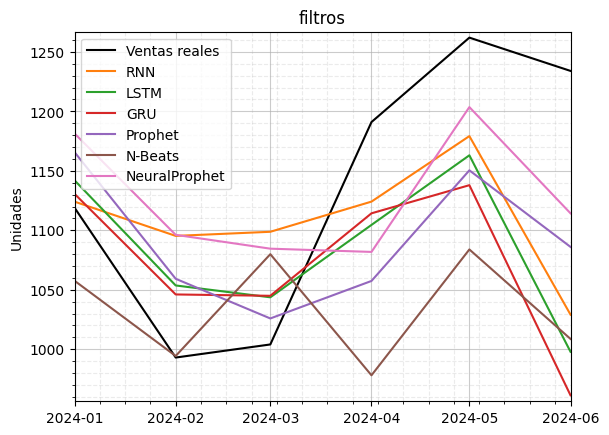

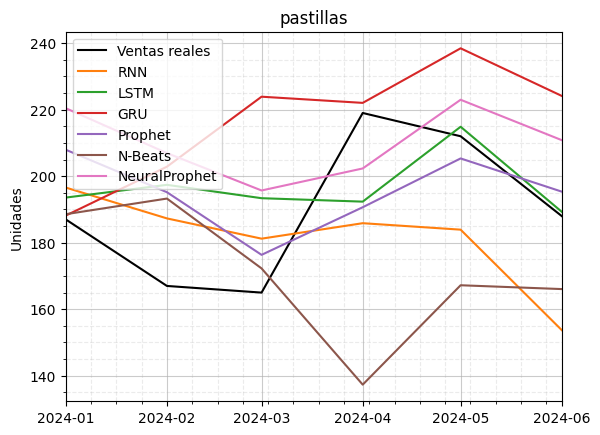

In [4]:
for name in names:
    df = pd.read_csv(f'results/resultados_{name}.csv')
    df['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")
    df = df.set_index(['fecha'])
    df_mes = df.groupby(pd.Grouper(freq='MS')).sum()
    fig, ax = plt.subplots()
    lines = ax.plot(df_mes, label=df.columns)
    lines[0].set_color('k')
    lines[0].set_label('Ventas reales')
    ax.minorticks_on()
    ax.grid(which='major', alpha = 0.65, linestyle='-')
    ax.grid(which='minor', alpha = 0.25, linestyle='--')
    ax.axis([dt(2024,1,1), dt(2024,6,1), min(df_mes.min())-5, max(df_mes.max())+5])
    ax.legend(loc='upper left')
    ax.set_ylabel('Unidades')
    ax.set_title(f'{name}')
    plt.savefig(f'figs/prediccion_mes_{name}.svg')

,RNN,LSTM,GRU,Prophet,N-Beats,NeuralProphet
Diario,3.8,3.7,3.9,3.5,4.7,4.7
Mensual,25.3,20.4,33.6,19.4,40.6,27.6


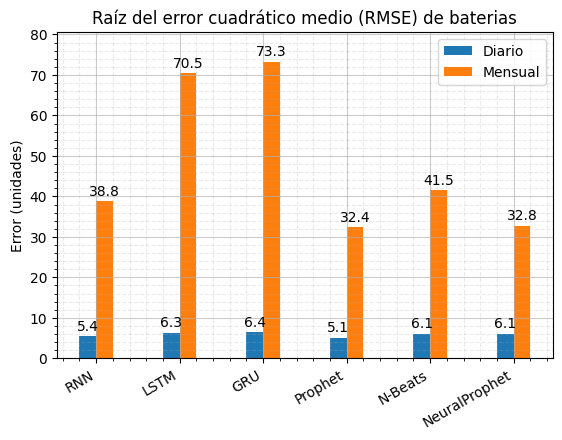

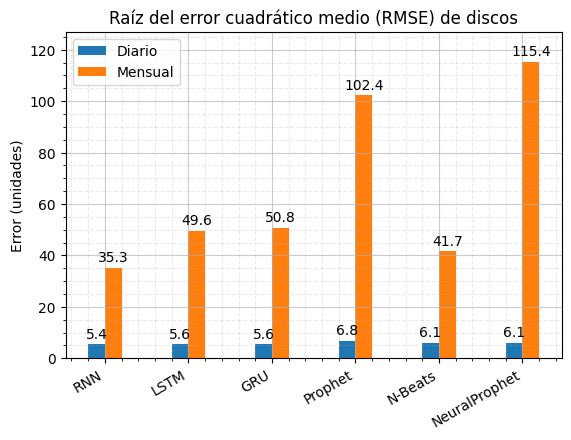

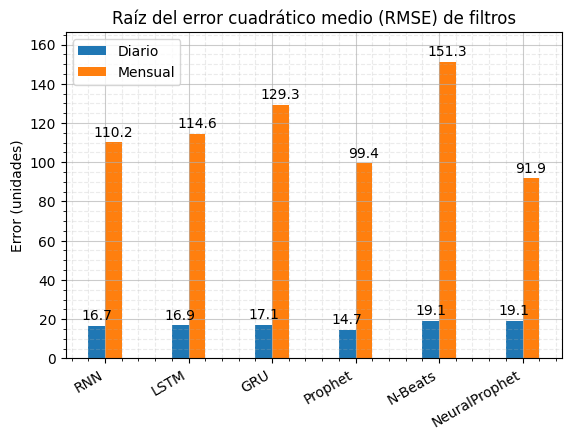

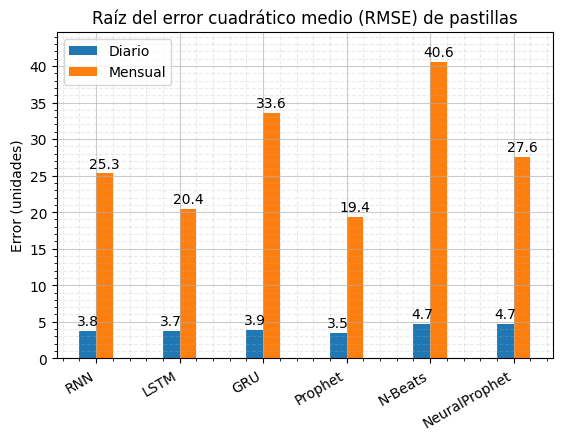

In [7]:
for name in names:
    df = pd.read_csv(f'results/errores_{name}.csv',index_col=0)
    df = df.round(1)
    df = df.drop('Diario_escalado')
    fig, ax = plt.subplots()

    x = np.arange(len(df.columns))  # the label locations

    width = 0.2

    multiplier = 0

    for tipo, medida in df.iterrows():          
        offset = width/2 + width * multiplier
        rects = ax.bar(x= x + offset, height=medida, width=width, label=tipo)
        ax.bar_label(rects, padding=len(df))
        multiplier += 1

    ax.set_ylabel('Error (unidades)')
    # ax.set_xlabel('Modelo')
    ax.set_title(f'Raíz del error cuadrático medio (RMSE) de {name}')
    ax.set_xticks(x + width, df.columns)
    ax.legend()
    ax.axis(ymin=0, ymax=max(df.max())*1.1)
    ax.minorticks_on()
    ax.grid(which='major', alpha = 0.65, linestyle='-')
    ax.grid(which='minor', alpha = 0.25, linestyle='--')
    fig.autofmt_xdate()
    fig.savefig(f'figs/rmse_{name}.svg')